### Experimentando

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Cargar archivo de audio
audio_path = 'Colines-Muestra-DataAug/a/20231021_190000a_segment_10.wav'
y, sr = librosa.load(audio_path)

# Generar espectrograma
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512)
mel_frequencies = librosa.mel_frequencies(n_mels=256)
librosa.display.specshow(librosa.power_to_db(spect, ref=np.max), y_axis='mel', x_axis='time')
plt.ylim(1024, 4096)
plt.colorbar(format='%+2.0f dB')
plt.show()


### Primer Preprocesamiento
#### Picar en audios de 2 minutos 

In [ ]:
import librosa
import soundfile as sf
import numpy as np
import os

# Ruta al directorio que contiene los archivos de audio originales
input_directory = 'Colines-Muestra'

# Ruta al directorio donde guardarás los nuevos segmentos de audio
output_directory = 'Colines-Muestra-DataAug'

# Lista de archivos de audio en el directorio de entrada
audio_files = os.listdir(input_directory)

# Duración deseada para cada segmento en segundos (2 minutos = 120 segundos)
segment_duration = 120

# Itera sobre cada archivo de audio
for audio_file in audio_files:
    # Ruta completa al archivo de audio original
    audio_path = os.path.join(input_directory, audio_file)

    # Carga el audio
    y, sr = librosa.load(audio_path, sr=None)

    # Calcula la cantidad de segmentos de 2 minutos
    num_segments = len(y) // (segment_duration * sr)

    # Itera sobre cada segmento
    for i in range(num_segments):
        # Extrae el segmento actual de 2 minutos
        segment = y[i * segment_duration * sr: (i + 1) * segment_duration * sr]

        # Guarda el segmento en un nuevo archivo
        output_filename = f"{os.path.splitext(audio_file)[0]}_segment_{i + 1}.wav"
        output_path = os.path.join(output_directory, output_filename)

        # Guarda el segmento como archivo de audio utilizando soundfile
        sf.write(output_path, segment, sr)



#### Ubicar en carpetas por micrófonos (Presumiblemente por ranas)

In [ ]:
import os
import shutil

# Ruta al directorio que contiene los segmentos de audio
directory = 'Colines-Muestra-DataAug'

# Lista de archivos de audio en el directorio de entrada
segment_files = os.listdir(directory)

# Itera sobre cada archivo de segmento
for segment_file in segment_files:
    # Ruta completa al archivo de segmento
    segment_path = os.path.join(directory, segment_file)

    # Extrae la etiqueta de la rana del nombre del archivo
    rana_label = segment_file[15]  # Ajusta el índice según la posición de la etiqueta en el nombre del archivo

    # Crea el directorio para la rana si no existe
    rana_directory = os.path.join(directory, rana_label)
    os.makedirs(rana_directory, exist_ok=True)

    # Mueve el archivo de segmento a la carpeta correspondiente a la rana
    output_path = os.path.join(rana_directory, segment_file)
    shutil.move(segment_path, output_path)


#### Exprimentando para ver espectrogramas de los audios de 2min

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Ruta al directorio que contiene las carpetas de cada rana
input_directory = 'Colines-Muestra-DataAug'

# Lista de carpetas (cada una representa una rana)
rana_folders = os.listdir(input_directory)

# Itera sobre cada carpeta de rana
for rana_folder in rana_folders:
    # Ruta completa a la carpeta de la rana
    rana_folder_path = os.path.join(input_directory, rana_folder)

    # Lista de archivos en la carpeta de la rana
    rana_files = os.listdir(rana_folder_path)

    if len(rana_files) > 0:
        # Toma el primer archivo de la carpeta
        primer_archivo = rana_files[0]
        archivo_path = os.path.join(rana_folder_path, primer_archivo)

        # Carga el audio
        y, sr = librosa.load(archivo_path)

        # Calcula el espectrograma con parámetros adicionales
        espectrograma = librosa.feature.melspectrogram(y=y, sr=sr)

        # Muestra el espectrograma
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(librosa.power_to_db(espectrograma, ref=np.max), y_axis='mel', x_axis='time')
        plt.ylim(1024,4096)
        plt.title(f'Mel-Espectrograma - Rana {rana_folder}')
        plt.colorbar(format='%+2.0f dB')
        plt.show()

#### Obteniendo el mel-espectrograma de cada audio de 2min


In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Ruta al directorio que contiene las carpetas de cada rana
input_directory = 'output'

# Lista de carpetas (cada una representa una rana)
rana_folders = os.listdir(input_directory)

# Itera sobre cada carpeta de rana
for rana_folder in rana_folders:
    # Ruta completa a la carpeta de la rana
    rana_folder_path = os.path.join(input_directory, rana_folder)

    # Lista de archivos en la carpeta de la rana
    rana_files = os.listdir(rana_folder_path)

    # Itera sobre cada archivo de la rana
    for rana_file in rana_files:
        archivo_path = os.path.join(rana_folder_path, rana_file)

        # Carga el audio
        y, sr = librosa.load(archivo_path, sr=None)

        # Aplica un filtro de preénfasis
        y_preemphasized = librosa.effects.preemphasis(y)

        # Calcula el espectrograma con parámetros adicionales
        espectrograma = librosa.feature.melspectrogram(y=y_preemphasized, sr=sr, n_fft=2048, hop_length=512)

        # Guarda o realiza alguna acción con el espectrograma filtrado (ejemplo: guardar imagen)
        output_path = os.path.join(f'{rana_folder_path}', f'{rana_folder}_{rana_file}.png')
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(librosa.power_to_db(espectrograma, ref=np.max), y_axis='mel', x_axis='time')
        plt.ylim(1024,4096)
        plt.title(f'Espectrograma Filtrado - Rana {rana_folder} - Archivo {rana_file}')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(output_path)
        plt.clf()
        plt.close()



### Segundo Preprocesamiento
#### Picando en audios de 10seg

In [3]:
import librosa
import soundfile as sf
import numpy as np
import os

# Ruta al directorio que contiene los archivos de audio originales
input_directory = 'folder'

# Ruta al directorio donde guardarás los nuevos segmentos de audio
output_directory = 'output'

# Lista de archivos de audio en el directorio de entrada
audio_files = os.listdir(input_directory)

# Duración deseada para cada segmento en segundos
segment_duration = 10

# Itera sobre cada archivo de audio
for audio_file in audio_files:
    # Ruta completa al archivo de audio original
    audio_path = os.path.join(input_directory, audio_file)

    # Carga el audio
    y, sr = librosa.load(audio_path, sr=None)

    # Calcula la cantidad de segmentos de 10 segundos
    num_segments = len(y) // (segment_duration * sr)

    # Itera sobre cada segmento
    for i in range(num_segments):
        # Extrae el segmento actual de 10 segundos
        segment = y[i * segment_duration * sr: (i + 1) * segment_duration * sr]

        # Guarda el segmento en un nuevo archivo
        output_filename = f"{os.path.splitext(audio_file)[0]}._{i + 1}.wav"
        output_path = os.path.join(output_directory, output_filename)

        # Guarda el segmento como archivo de audio utilizando soundfile
        sf.write(output_path, segment, sr)

#### Ubicando en carpetas

In [4]:
import os
import shutil

# Ruta al directorio que contiene los segmentos de audio
directory = 'output'

# Lista de archivos de audio en el directorio de entrada
segment_files = os.listdir(directory)

# Itera sobre cada archivo de segmento
for segment_file in segment_files:
    # Ruta completa al archivo de segmento
    segment_path = os.path.join(directory, segment_file)

    # Extrae la etiqueta de la rana del nombre del archivo
    rana_label = segment_file[15]  # Ajusta el índice según la posición de la etiqueta en el nombre del archivo

    # Crea el directorio para la rana si no existe
    rana_directory = os.path.join(directory, rana_label)
    os.makedirs(rana_directory, exist_ok=True)

    # Mueve el archivo de segmento a la carpeta correspondiente a la rana
    output_path = os.path.join(rana_directory, segment_file)
    shutil.move(segment_path, output_path)

#### Obteniendo mel-espectrograma de cada audio de 10s

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Ruta al directorio que contiene las carpetas de cada rana
input_directory = 'output'

# Lista de carpetas (cada una representa una rana)
rana_folders = os.listdir(input_directory)

# Itera sobre cada carpeta de rana
for rana_folder in rana_folders:
    # Ruta completa a la carpeta de la rana
    rana_folder_path = os.path.join(input_directory, rana_folder)

    # Lista de archivos en la carpeta de la rana
    rana_files = os.listdir(rana_folder_path)

    # Itera sobre cada archivo de la rana
    for rana_file in rana_files:
        archivo_path = os.path.join(rana_folder_path, rana_file)

        # Carga el audio
        y, sr = librosa.load(archivo_path, sr=None)

        # Aplica un filtro de preénfasis
        y_preemphasized = librosa.effects.preemphasis(y)

        # Calcula el espectrograma con parámetros adicionales
        espectrograma = librosa.feature.melspectrogram(y=y_preemphasized, sr=sr, n_fft=2048, hop_length=512)

        # Guarda o realiza alguna acción con el espectrograma filtrado (ejemplo: guardar imagen)
        output_path = os.path.join(f'{rana_folder_path}', f'{rana_folder}_{rana_file}.png')
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(librosa.power_to_db(espectrograma, ref=np.max), y_axis='mel', x_axis='time')
        plt.ylim(1024,4096)
        plt.title(f'Espectrograma Filtrado - Rana {rana_folder} - Archivo {rana_file}')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(output_path)
        plt.clf()
        plt.close()

#### Experimentando con el gráfico de energía

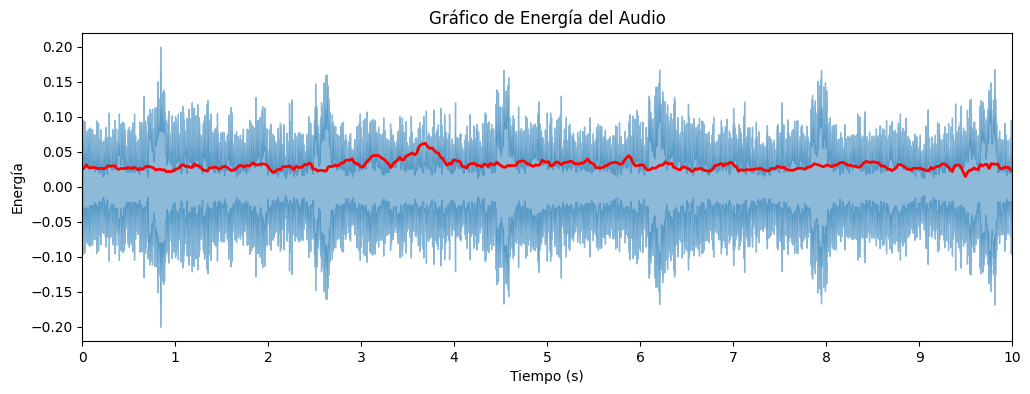

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Ruta al archivo de audio
audio_path = 'output/a/20231021_190000a_segment_1._1.wav'

# Carga el audio y la tasa de muestreo
y, sr = librosa.load(audio_path, sr=None)

# Calcula la energía cuadrática
energia = librosa.feature.rms(y=y)

# Crea un vector de tiempo para el eje x
tiempo = librosa.times_like(energia)

# Grafica la energía
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(tiempo, energia[0], color='r', linewidth=2)
plt.title('Gráfico de Energía del Audio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía')
plt.xlim(0,10)
plt.show()


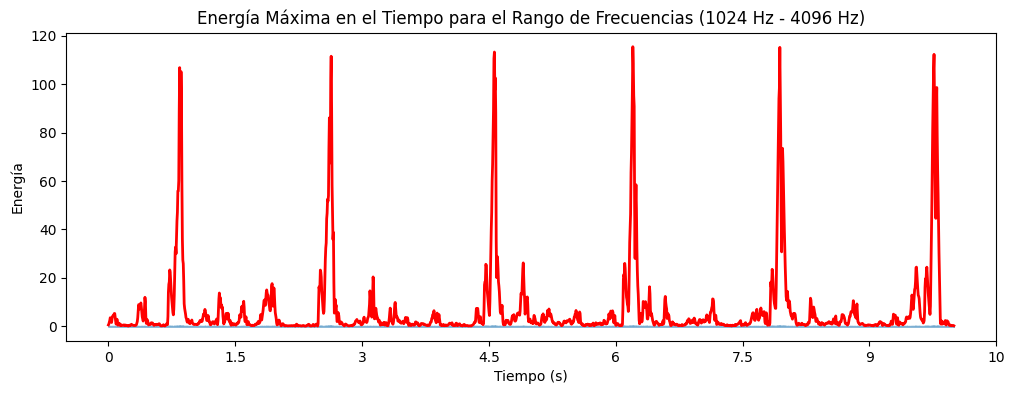

In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Ruta al archivo de audio
audio_path = 'output/a/20231021_190000a_segment_1._1.wav'

# Carga el audio y la tasa de muestreo
y, sr = librosa.load(audio_path, sr=None)

# Aplica un filtro de preénfasis
y_preemphasized = librosa.effects.preemphasis(y)

# Configuración de la transformada de Fourier
n_fft = 2048
hop_length = 512

# Calcula la transformada de Fourier en el rango de frecuencias completo
fft_result = librosa.stft(y_preemphasized, n_fft=n_fft, hop_length=hop_length)

# Encuentra los índices correspondientes al rango de frecuencias deseado
frecuencias = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
indice_inicio = np.argmax(frecuencias >= 1024)
indice_final = np.argmax(frecuencias >= 4096)

# Calcula la energía en el rango de frecuencias deseado para cada ventana de tiempo
energia_en_rango = np.sum(np.abs(fft_result[indice_inicio:indice_final, :])**2, axis=0)

# Visualiza la gráfica de energía máxima en el tiempo
tiempo = librosa.times_like(energia_en_rango, sr=sr, hop_length=hop_length)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(tiempo, energia_en_rango, color='r', linewidth=2)
plt.title('Energía Máxima en el Tiempo para el Rango de Frecuencias (1024 Hz - 4096 Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía')
plt.show()


#### Calculando mel-espectrograma y energía de cada audio de 10s

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Ruta al directorio que contiene las carpetas de cada rana
input_directory = 'output'

# Lista de carpetas (cada una representa una rana)
rana_folders = os.listdir(input_directory)

# Itera sobre cada carpeta de rana
for rana_folder in rana_folders:
    # Ruta completa a la carpeta de la rana
    rana_folder_path = os.path.join(input_directory, rana_folder)

    # Lista de archivos en la carpeta de la rana
    rana_files = os.listdir(rana_folder_path)

    # Itera sobre cada archivo de la rana
    for rana_file in rana_files:
        if(rana_file.endswith(".wav")):
            archivo_path = os.path.join(rana_folder_path, rana_file)

            # Carga el audio
            y, sr = librosa.load(archivo_path, sr=None)

            # Aplica un filtro de preénfasis
            y_preemphasized = librosa.effects.preemphasis(y)

            # Configuración de la transformada de Fourier
            n_fft = 2048
            hop_length = 512

            # Calcula la transformada de Fourier en el rango de frecuencias completo
            fft_result = librosa.stft(y_preemphasized, n_fft=n_fft, hop_length=hop_length)

            # Encuentra los índices correspondientes al rango de frecuencias deseado
            frecuencias = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
            indice_inicio = np.argmax(frecuencias >= 1024)
            indice_final = np.argmax(frecuencias >= 4096)

            # Calcula la energía en el rango de frecuencias deseado para cada ventana de tiempo
            energia_en_rango = np.sum(np.abs(fft_result[indice_inicio:indice_final, :])**2, axis=0)

            # Calcula el mel-espectrograma solo en el rango deseado
            espectrograma = librosa.feature.melspectrogram(y=y_preemphasized, sr=sr, n_fft=n_fft, hop_length=hop_length, fmin=1024, fmax=4096)

            # Multiplica la gráfica de energía por 10
            energia_en_rango *= 20

            # Guarda o realiza alguna acción con el espectrograma filtrado (ejemplo: guardar imagen)
            output_path = os.path.join(f'{rana_folder_path}', f'{rana_folder}_{rana_file}.png')
            plt.figure(figsize=(12, 6))

            # Mel-espectrograma con líneas de la gráfica de energía
            librosa.display.specshow(librosa.power_to_db(espectrograma, ref=np.max), y_axis='mel', x_axis='time', sr=sr, hop_length=hop_length)
            plt.title(f'Mel-Espectrograma con Energía - Rana {rana_folder} - Archivo {rana_file}')
            plt.colorbar(format='%+2.0f dB')

            # Dibuja las líneas de la gráfica de energía en el mismo gráfico
            tiempo_en_segundos = librosa.times_like(energia_en_rango, sr=sr, hop_length=hop_length)
            plt.plot(tiempo_en_segundos, energia_en_rango, color='r', linewidth=2)

            # Ajusta el diseño y muestra el gráfico
            plt.tight_layout()
            plt.savefig(output_path)
            plt.clf()
            plt.close()


/home/danielhp/.local/lib/python3.8/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


#### Preparando el dataset para ML

In [1]:
import os
import shutil

# Ruta al directorio que contiene las carpetas de cada rana con los archivos PNG
input_directory = 'output'

# Ruta al nuevo directorio donde se copiarán los archivos manteniendo la estructura de carpetas
output_directory = 'dataset'

# Asegúrate de que el directorio de salida exista o créalo
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Itera sobre cada carpeta de rana en el directorio de entrada
for rana_folder in os.listdir(input_directory):
    # Ruta completa a la carpeta de la rana en el directorio de entrada
    rana_folder_path_input = os.path.join(input_directory, rana_folder)

    # Ruta completa a la carpeta de la rana en el nuevo directorio de salida
    rana_folder_path_output = os.path.join(output_directory, rana_folder)

    # Asegúrate de que la carpeta de la rana en el directorio de salida exista o créala
    if not os.path.exists(rana_folder_path_output):
        os.makedirs(rana_folder_path_output)

    # Itera sobre cada archivo en la carpeta de la rana en el directorio de entrada
    for filename in os.listdir(rana_folder_path_input):
        if(filename.endswith(".png")):
            # Ruta completa al archivo en el directorio de entrada
            file_path_input = os.path.join(rana_folder_path_input, filename)

            # Ruta completa al archivo en el nuevo directorio de salida
            file_path_output = os.path.join(rana_folder_path_output, filename)

            # Copia el archivo al nuevo directorio
            shutil.copyfile(file_path_input, file_path_output)

print("Proceso de copia completado.")


Proceso de copia completado.
